In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import Kinect

importing Jupyter notebook from Kinect.ipynb


In [2]:
dir_path = "D:\\HK_PS4_Data to Xuan & Junjie\\Kinect_Sensor_data"

In [3]:
#  获得所有测试的Kinect文件路径，并计数

Kinect_files_path = []

for root, dirs, files in os.walk(dir_path):
    if root[-15:-11] == "3TUG":
        for file in os.listdir(root):
            if file == "modified_Kin.csv":
                Kinect_files_path.append(os.path.join(root, file))

# 判别出空的测试文件，记录在列表中

empty_Kpath = []
for i in range(len(Kinect_files_path)):
    Kinect_data = Kinect.Kinect(pd.read_csv(Kinect_files_path[i]))
    if Kinect_data.get_timestamp() == []:
        empty_Kpath.append([i, Kinect_files_path[i]])

#  从Kinect文件路径列表中移除空文件的路径

for i in range(len(empty_Kpath)):
    Kinect_files_path.remove(empty_Kpath[i][1])

In [28]:
#  将文件路径按照社区名称分类,得到一个字典
fil_clsfied_cen = {'Fortune Neighbourhood Elderly Centre':[],
                   'Shamshuipo Day Care Centre for the Elderly':[],
                   'Shun Lee Neighborhood Elderly Centre':[],
                   'Un Chau Neighborhood Elderly Centre':[]
                  }

for path in Kinect_files_path:
    for centre in fil_clsfied_cen.keys():
        if (centre in path):
            fil_clsfied_cen[centre].append(path)

In [31]:
# 导入IMU数据的时间切割点
IMU_file = "F:\\Jupyter\\TUG\\IMU_time.xlsx"
IMU_timepoints = pd.read_excel(IMU_file)

In [32]:
#  将IMU数据按照社区名称分类
Un_Chau = IMU_timepoints[IMU_timepoints['centre'] == '元州']
Fortune = IMU_timepoints[IMU_timepoints['centre'] == '幸福']
Shamshuipo = IMU_timepoints[IMU_timepoints['centre'] == '深水埗']
Shun_Lee = IMU_timepoints[IMU_timepoints['centre'] == '顺利']

spltime_clsfied_cen = {'Fortune Neighbourhood Elderly Centre':Fortune,
                       'Shamshuipo Day Care Centre for the Elderly':Shamshuipo,
                       'Shun Lee Neighborhood Elderly Centre':Shun_Lee,
                       'Un Chau Neighborhood Elderly Centre':Un_Chau
                      }

In [36]:
#  记录各个社区的测试时间
test_date = {'Un Chau Neighborhood Elderly Centre':['2019-12-05', '2019-12-12'],
             'Fortune Neighbourhood Elderly Centre':['2020-01-03', '2020-01-09'],
             'Shamshuipo Day Care Centre for the Elderly':['2019-12-09', '2019-12-16'],
             'Shun Lee Neighborhood Elderly Centre':['2019-11-05', '2019-12-20']}

In [37]:
#  将IMU数据按照每个测试的文件路径对应存储
path_spltime = {}
for centre_name in fil_clsfied_cen.keys():
    for file_path in fil_clsfied_cen[centre_name]:
        for _id in spltime_clsfied_cen[centre_name]['ID']:
            test_id = "test"+str(_id)
            if (test_id in file_path) and (test_date[centre_name][0] in file_path):
                path_spltime[file_path] = [test_id,
                                           test_date[centre_name][0],
                                           spltime_clsfied_cen[centre_name].loc[spltime_clsfied_cen[centre_name]['ID']==_id, 'first-1':'first-4']]
            elif (test_id in file_path) and (test_date[centre_name][1] in file_path):
                path_spltime[file_path] = [test_id,
                                           test_date[centre_name][1],
                                           spltime_clsfied_cen[centre_name].loc[spltime_clsfied_cen[centre_name]['ID']==_id, 'sec-1':'sec-4']]

In [47]:
path_spltime['D:\\HK_PS4_Data to Xuan & Junjie\\Kinect_Sensor_data\\PS4_Kinect&Sensor_Fortune Neighbourhood Elderly Centre\\test1\\3TUG\\2020-01-03\\modified_Kin.csv'][2].iloc[0]

first-1     3.062862
first-2     5.491662
first-3     7.725262
first-4    10.173262
Name: 17, dtype: float64

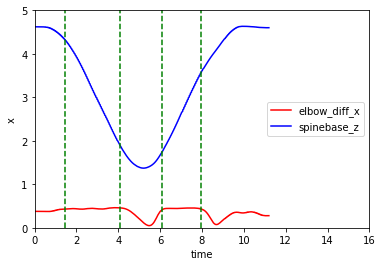

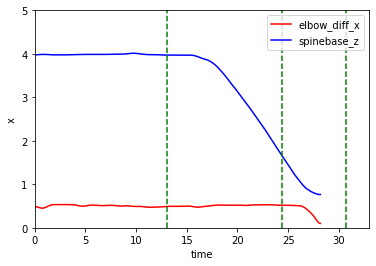

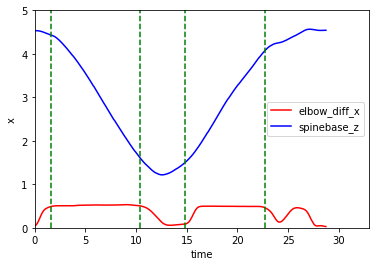

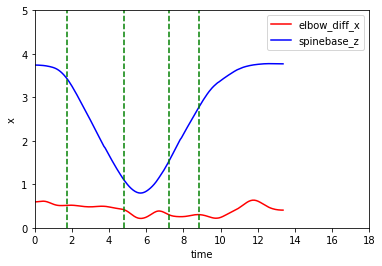

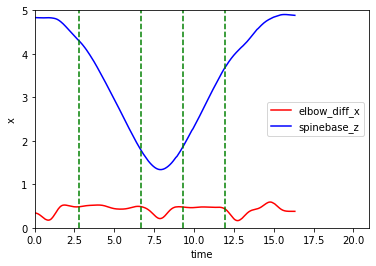

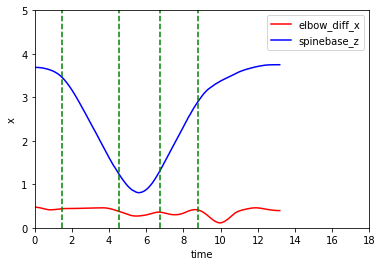

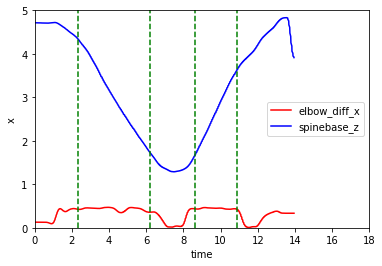

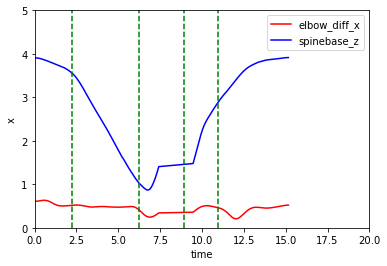

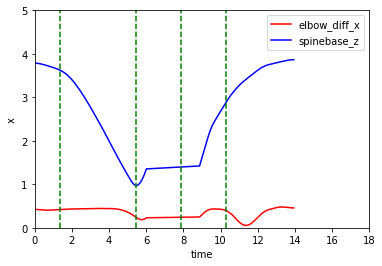

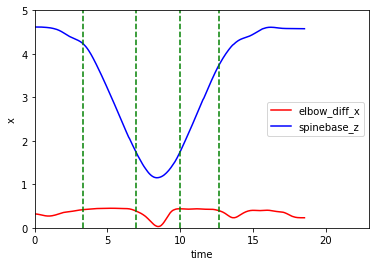

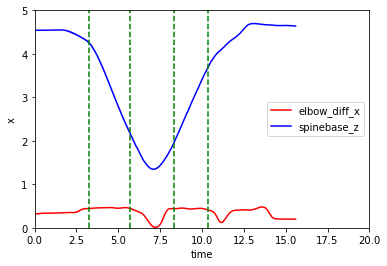

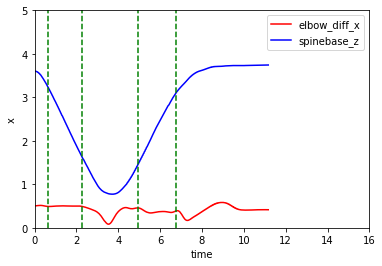

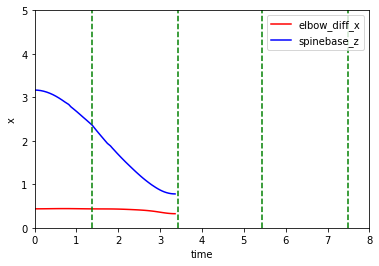

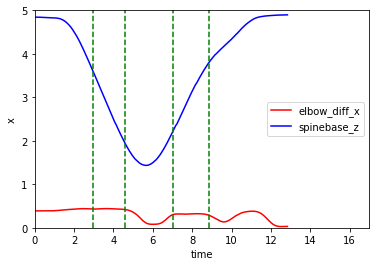

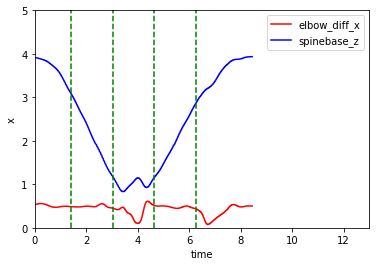

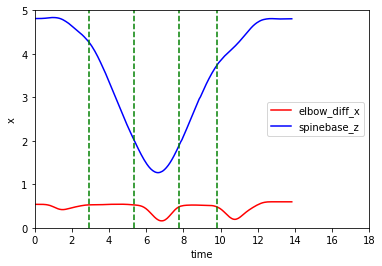

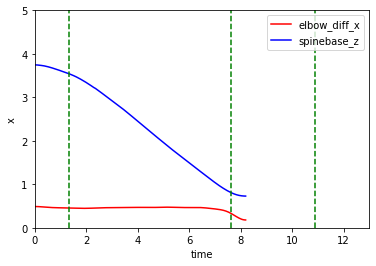

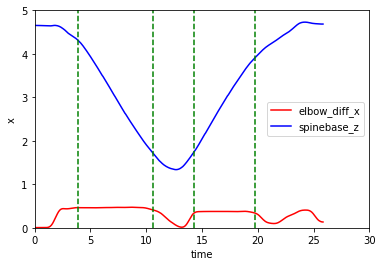

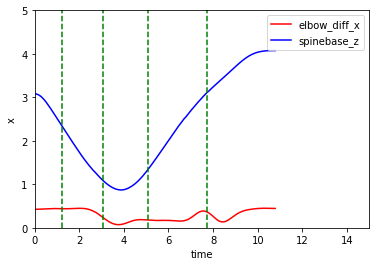

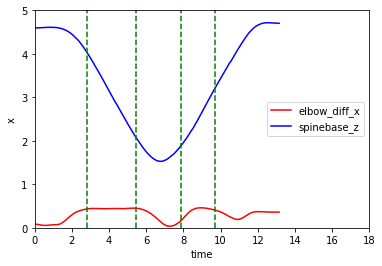

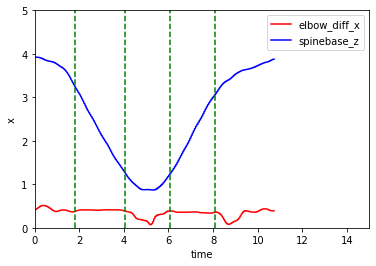

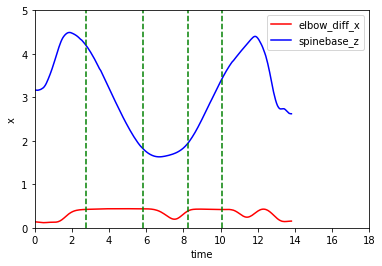

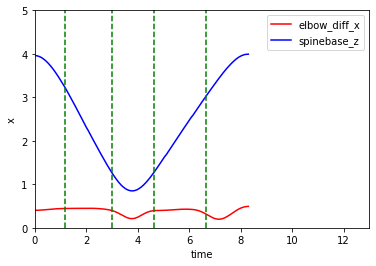

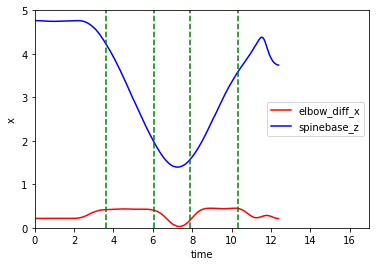

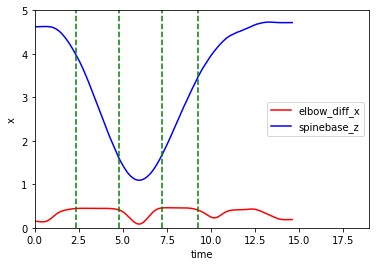

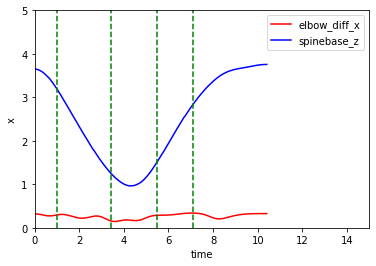

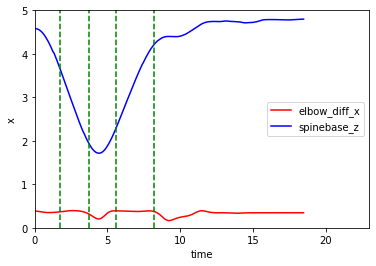

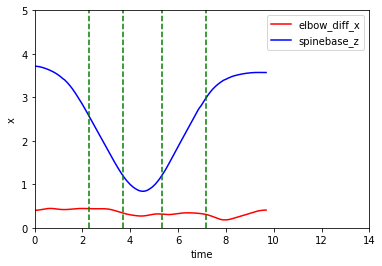

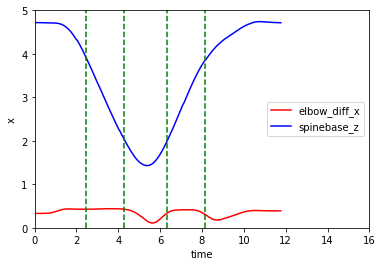

In [49]:
for i in range(len(fil_clsfied_cen['Shun Lee Neighborhood Elderly Centre'])):
    kinect_data = Kinect.Kinect_split(pd.read_csv(fil_clsfied_cen['Shun Lee Neighborhood Elderly Centre'][i]))

    elbow_diff = kinect_data.elbow_diff()
    sb_z_filt = kinect_data.sb_z()

    info_list = path_spltime[fil_clsfied_cen['Shun Lee Neighborhood Elderly Centre'][i]].copy()

    #  walking_start_index, turning_start_index, turning_end_index, walking_end_index = info_list[2]
    points_time = [i for i in info_list[2].iloc[0]]
    #  print(points_time)
    
    
    fig = plt.figure()
    plt.plot(kinect_data.get_timestamp(),
             elbow_diff,
             'r',
             label="elbow_diff_x")

    plt.plot(kinect_data.get_timestamp(),
             sb_z_filt,
             'b',
             label="spinebase_z")

    plt.xlim((0, int(kinect_data.get_maxtime())+5))
    plt.ylim((0, 5))

    plt.xlabel("time")
    plt.ylabel("x")

    
    plt.vlines(points_time,
               0, 5,
               'g',
               linestyles='dashed')
    
    '''
    plt.vlines([kinect_data.get_timestamp()[turning_start_index],
                kinect_data.get_timestamp()[turning_end_index],
                kinect_data.get_timestamp()[walking_start_index],
                kinect_data.get_timestamp()[walking_end_index]],
                0, 5,
                'g',
                linestyles='dashed')
    '''
    
    plt.legend()
    plt.show()